# TP 3 - ML B
### Thomas Migliasso - Kerrian Le Caillec

1. Simulation d’un modèle de mélange gaussien diagonal :
    
    — Écrire une fonction qui simule n points du plan suivant un modèle de
mélange de deux lois gaussiennes diagonales (K = 2) définies par leurs
proportions, centres, volumes et formes (on rappelle que les classes seront orientées horizontalement et verticalement, le modèle de mélange
étant diagonal).
    
    — Donner quelques exemples de simulation et illustrer les représentations graphiques correspondantes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_points(n, pi, mu, sigma):
    """
    Point simulation.
    
    Parameters:
    n (int): Number of points.
    pi (int): Proportion of first blob.
    mu : Means of the Gaussian distributions.
    sigma: Covariance matrices of the Gaussian distributions. 
    """
    k = np.random.binomial(n, pi)
    points0 = np.random.multivariate_normal(mu[0], sigma[0], size=(k))
    points1 = np.random.multivariate_normal(mu[1], sigma[1], size=(n - k))
    return np.concatenate([points0, points1])

In [8]:
def plot_points(ax, points, **kwargs):
    ax.scatter(points[:, 0], points[:, 1], **kwargs)
    ax.set_title("Point cloud using Gaussian mixtures")
    ax.legend()

In [9]:
points = generate_points(1000, 0.1, [[0, 0], [10, 10]], [[[0.1, 0], [0, 0.1]], [[0.1, 0], [0, 0.1]]])
points1 = generate_points(1000, 0.5, [[0, 0], [2, 2]], [[[1, 0], [0, 1]], [[0.5, 0], [0, 0.5]]])


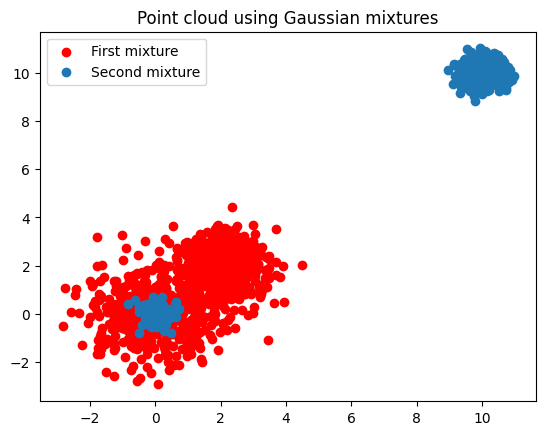

In [11]:
_, ax = plt.subplots()

plot_points(ax, points1, color="red", label="First mixture")
plot_points(ax, points, label="Second mixture")

2. Programmer l’algorithme des centres-mobiles (K-means).

In [12]:
def k_means(X, k, max_iters=100, eps=1e-4):
    """
    K-Means Clustering Algorithm.
    
    Parameters:
    X: Data points.
    k (int): Number of clusters.
    max_iters (int): Maximum number of iterations.
    eps (float): Tolerated error of convergence.
    """
    # Initialize centroids
    n_samples = len(X)
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):

        # Assign points to the nearest cluster ("E-step")
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Recalculate centroids as the mean of assigned points ("M-step")
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < eps):
            break
        
        centroids = new_centroids

    return centroids, labels

3. Simuler n = 1000 points du plan suivant un modèle de mélange gaussien
diagonal de deux densités ($K = 2$) défini par les proportions des classes
supposées égales ($\pi_1 = \pi_2 = 0.5$), les variances des classes supposées
égales ($\Sigma_1 = \Sigma_2 = diag(1, 1)$), les centres des classes ($\mu_1 = (−2, 0)^T$
et $\mu_2$ choisi en fonction des degrés de mélange entre les classes). Les
trois valeurs de $\mu_2$ retenues en fonction de leurs taux d’erreur théorique
approximatifs seront $\mu_2 = (1.1, 0)^T$ pour un taux d’erreur théorique approximatif (degré de mélange) de 6 %, $\mu_2 = (0, 0)^T$ pour un taux d’erreur
théorique approximatif de 16 % et $\mu_2 = (−0.6, 0)^T$ pour un taux d’erreur
théorique approximatif de 26 %. Cela donne lieu à trois jeux de données.

In [13]:
n = 1000
pi = 0.5
sigma = [[1, 0], [0, 1]]
mu = [-2, 0]
nu0, nu1, nu2 = [1.1, 0], [0, 0], [-0.6, 0]
eps0, eps1, eps2 = 0.06, 0.16, 0.26

In [14]:
points0 = generate_points(n, pi, [mu, nu0], [sigma, sigma])
points1 = generate_points(n, pi, [mu, nu1], [sigma, sigma])
points2 = generate_points(n, pi, [mu, nu2], [sigma, sigma])

4. Appliquer l’algorithme des K-means au premier jeu de données (degré
de mélange de 6 %). Lancer l’algorithme plusieurs fois. Faut-il améliorer
l’initialisation de l’algorithme ? Le faire si nécessaire.

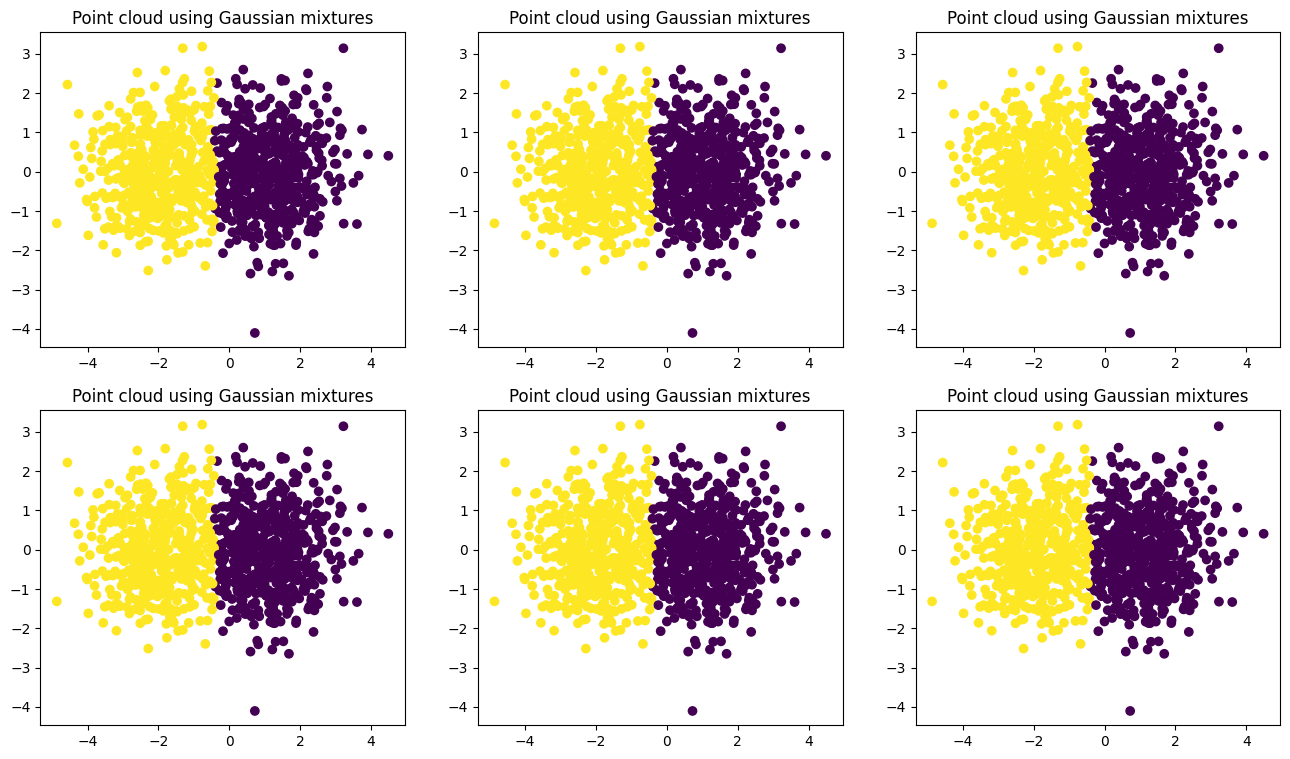

In [11]:
_, axs = plt.subplots(2, 3, figsize=(16, 9))
for i in range(6):
    _, labels = k_means(points0, 2, max_iters=100)
    plot_points(axs[i // 3, i % 3], points0, c=labels)

L'output du modèle est identique, l'algorithme semble converger vers une solution. Il n'est pas nécessaire de changer l'initialisation. 

5. Appliquer l’algorithme des K-means ainsi obtenu aux trois jeux de données simulées (degrés de mélange de 6 %, 16 % et 26 %). Commenter.

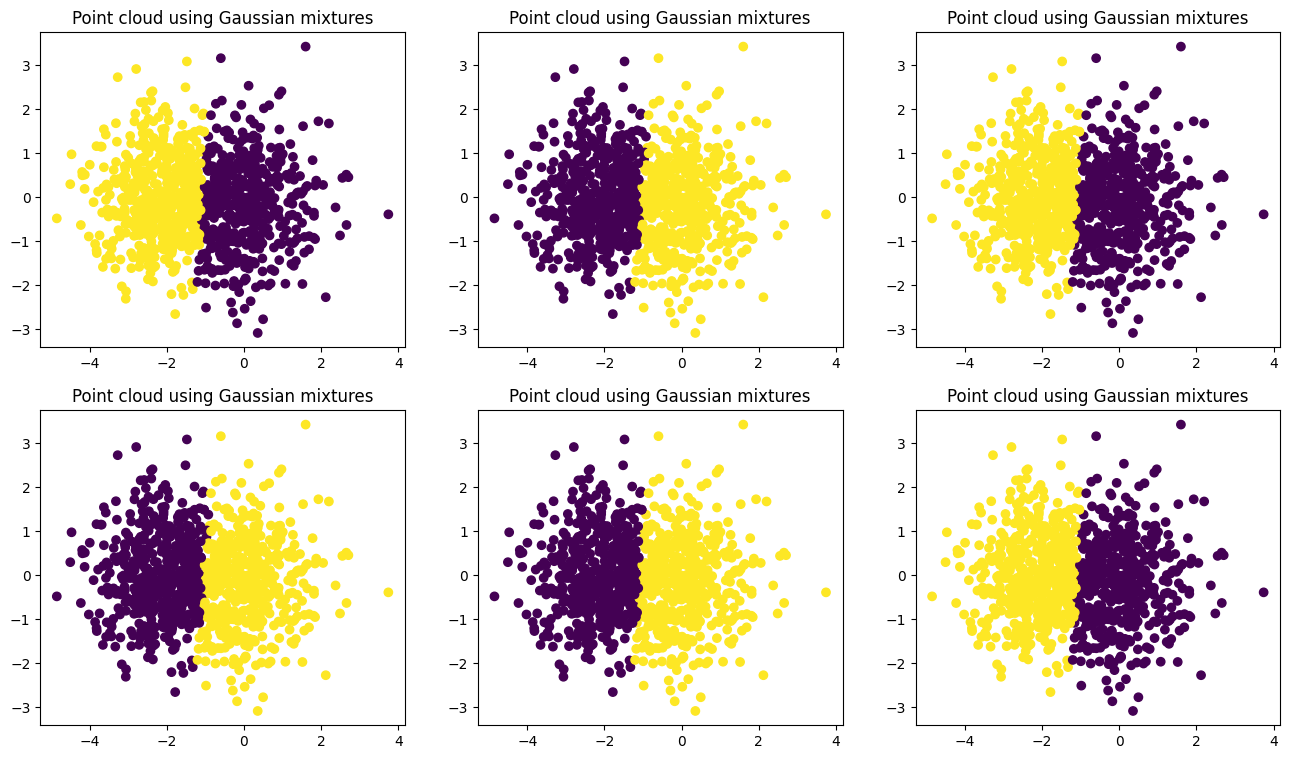

In [12]:
_, axs = plt.subplots(2, 3, figsize=(16, 9))
for i in range(6):
    _, labels = k_means(points1, 2, max_iters=1000)
    plot_points(axs[i // 3, i % 3], points1, c=labels)

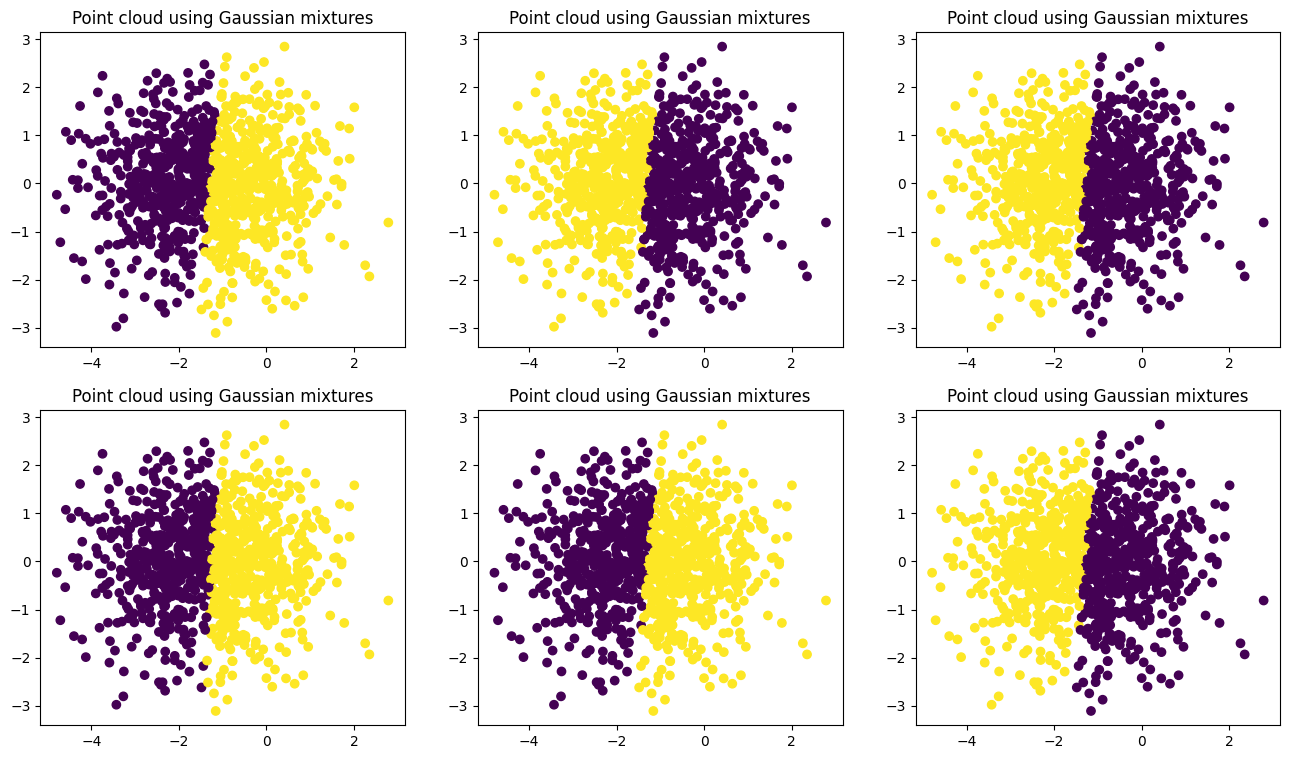

In [34]:
_, axs = plt.subplots(2, 3, figsize=(16, 9))
for i in range(6):
    _, labels = k_means(points2, 2, max_iters=5000)
    plot_points(axs[i // 3, i % 3], points2, c=labels)

Le résultat est à chaque fois un diagramme de Voronoi par rapport au centres de masses obtenus par le modèles, pour le degré de mélange à 6% ; le résultat restait plutôt proche de la séparation théorique car la mixture était peu mélangée, néanmoins, dans les deux autres cas plus les deux mixtures se confondent, plus la séparation est difficile.

6. Proposer un algorithme CEM adapté aux trois jeux de données simulées en précisant le modèle gaussien parcimonieux choisi et donner l'expression de la vraisemblance classifiante maximisée. Appliquer cet algorithme CEM aux trois jeux de données simulées (degrés de mélange de 6%, 16% et 26%). Commenter.

In [ ]:
from scipy.stats import multivariate_normal

def cem_algorithm(X, k, max_iters=500, eps=1e-4):
    """
    CEM classification

    Parameters:
    X: Data points.
    k (int): Number of clusters.
    max_iters (int): Maximum number of iterations.
    eps tolerated error of convergence.
    """
    n_samples, n_features = X.shape

    # Initialize the parameters
    pi = np.ones(k) / k
    mu = X[np.random.choice(n_samples, k, replace=False)]
    sigma = np.array([np.eye(n_features)] * k)

    for _ in range(max_iters):
        # E-step: Compute tau
        tau = np.zeros((n_samples, k))
        for i in range(k):
            tau[:, i] = pi[i] * multivariate_normal.pdf(X, mu[i], sigma[i])
        tau /= tau.sum(axis=1, keepdims=True)

        # C-step: maximize tau
        z = (tau == tau.max(axis=1, keepdims=True)).astype(int)

        # M-step: Update parameters
        N_k = z.sum(axis=0)
        pi = N_k / n_samples
        mu = (z.T @ X) / N_k[:, np.newaxis]
        sigma = np.zeros((k, n_features, n_features))
        for i in range(k):
            diff = X - mu[i]
            sigma[i] = (
                z[:, i][:, np.newaxis, np.newaxis]
                * diff[:, :, np.newaxis]
                @ diff[:, np.newaxis, :]
            ).sum(axis=0) / N_k[i]

        # Check for convergence
        if np.all(np.abs(N_k - z.sum(axis=0)) < eps):
            break

    return z.argmax(axis=1)

/tmp/ipykernel_631496/1682030258.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


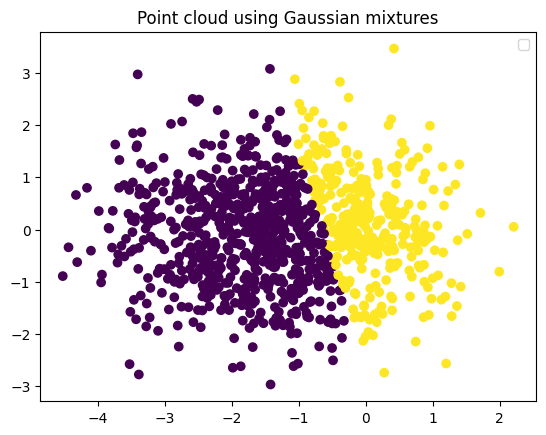

In [31]:
_, ax = plt.subplots()
labels = cem_algorithm(points2, 2)
plot_points(ax, points2, c=labels)

/tmp/ipykernel_631496/1682030258.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


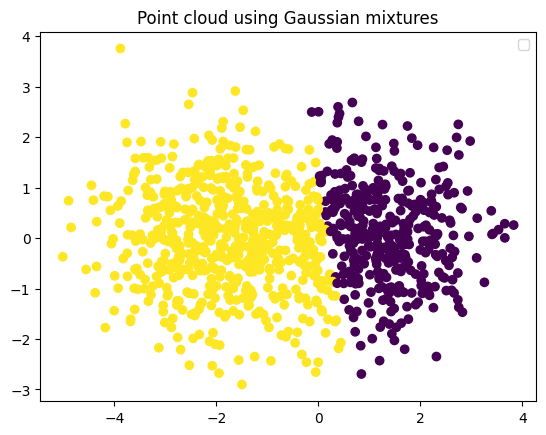

In [33]:
_, ax = plt.subplots()
labels = cem_algorithm(points0, 2)
plot_points(ax, points0, c=labels)

/tmp/ipykernel_631496/1682030258.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


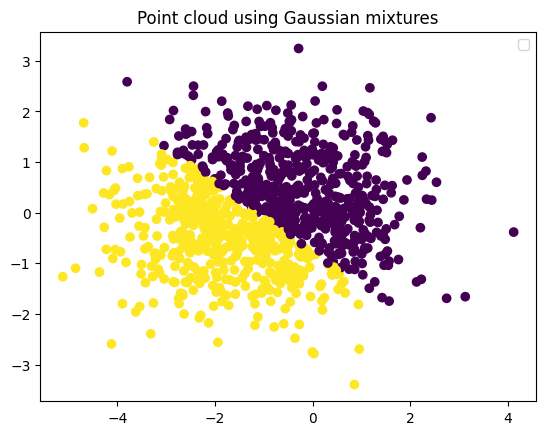

In [34]:
_, ax = plt.subplots()
labels = cem_algorithm(points1, 2)
plot_points(ax, points1, c=labels)